# First SVM algorithm to detect brake action

Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm

Load data

In [2]:
brake_train_df = pd.read_csv('./data/smartphone_23-Jan-2022-18-49_frenada repentina_Data-Mu8hmYsKr0gDXTtH4_T.csv')
print("data size: ", brake_train_df.shape)
brake_train_df.head()

data size:  (450, 18)


,id,accX,accY,accZ,eventClass,idTrip,idVehicle,latitude,longitude,magX,magY,magZ,route,speed,timestamp,velAngX,velAngY,velAngZ
0,4789,-0.038883,1.056730,9.765409,0,6,Nissan March (Xiaomi Redmi Note 9S),0.833949,-77.649995,5.71875,-43.612503,60.506252,Frenada repentina,9.683409,2022-01-23 18:49:18.883000-05:00,0.001065,-0.003196,0.003329
1,4790,-0.076271,1.055235,9.764811,0,6,Nissan March (Xiaomi Redmi Note 9S),0.833949,-77.649995,5.86875,-43.612503,60.393753,Frenada repentina,9.683409,2022-01-23 18:49:18.932000-05:00,0.002130,-0.001065,0.003595
2,4791,-0.060419,1.037887,9.749556,0,6,Nissan March (Xiaomi Redmi Note 9S),0.833949,-77.649995,5.86875,-43.481251,60.262501,Frenada repentina,9.683409,2022-01-23 18:49:18.981000-05:00,0.001731,-0.000666,0.003329
3,4792,-0.060419,1.037887,9.749556,0,6,Nissan March (Xiaomi Redmi Note 9S),0.833949,-77.649995,5.77500,-43.350002,60.056252,Frenada repentina,9.683409,2022-01-23 18:49:19.033000-05:00,0.001731,-0.000666,0.003329
4,4793,-0.026620,1.083949,9.736994,0,6,Nissan March (Xiaomi Redmi Note 9S),0.833949,-77.649995,5.79375,-43.387501,60.037502,Frenada repentina,9.683409,2022-01-23 18:49:19.082000-05:00,0.001065,-0.001065,0.002663


Plot data

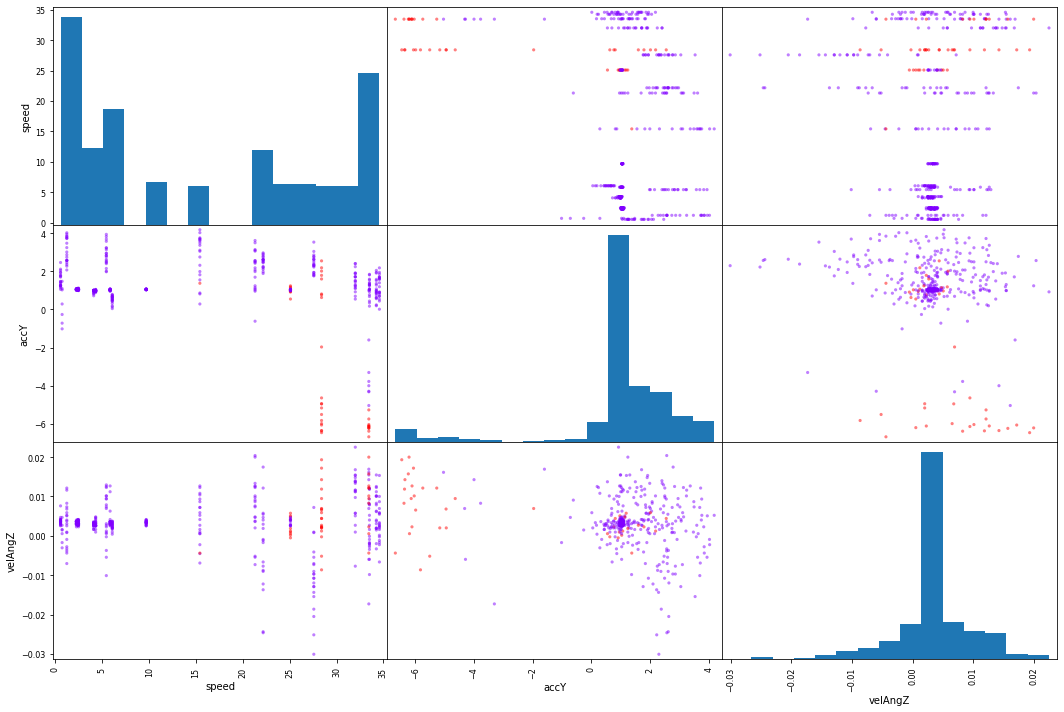

In [8]:
from matplotlib import cm
X = brake_train_df[['speed', 'accY', 'velAngZ']]
y = brake_train_df['eventClass']
cmap = cm.get_cmap('rainbow')
scatter = pd.plotting.scatter_matrix(X, c= y, marker = 'o', s=10, hist_kwds={'bins':15}, figsize=(18,12), cmap=cmap)

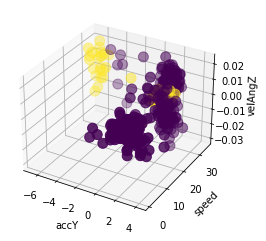

In [9]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X['accY'], X['speed'], X['velAngZ'], c = y, marker = 'o', s=100)
ax.set_xlabel('accY')
ax.set_ylabel('speed')
ax.set_zlabel('velAngZ')
plt.show()

In [14]:
brake_test_df = pd.read_csv('./data/smartphone_02-Feb-2022-20-05_frenada repentina_Data-Mv2GBn8gMBZPF-trJkU.csv')

X = brake_train_df[['speed', 'accY']]
y = brake_train_df['eventClass']

X_test = brake_test_df[['speed', 'accY']]
y_test = brake_test_df['eventClass']

print("Train data size: ", X.shape, "Test data size: ", X_test.shape)

Train data size:  (450, 2) Test data size:  (631, 2)


In [15]:
from sklearn import svm
clf = svm.SVC(C=1.0, kernel='rbf')
clf.fit(X,y)

SVC()

In [16]:
clf.score(X_test, y_test)

0.9635499207606973

In [21]:
test_data = brake_train_df[brake_train_df['eventClass'] == 1]  # Only near crash events
#test_data = brake_test_df[brake_test_df['eventClass'] == 0] # Only no near crash events
test_data = test_data[['speed', 'accY']]
test_data

,speed,accY
161,15.411777,1.375574
311,33.445763,-6.039485
312,33.445763,-5.271688
313,33.445763,-6.240780
314,33.445763,-6.215656
315,33.445763,-6.388238
316,33.445763,-5.747261
317,33.445763,-6.201299
318,33.445763,-6.116354
319,33.445763,-6.142675


In [22]:
clf.predict(test_data)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Plot model

In [50]:
def plot_mushroom_boundary(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)

        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.4, label='Edible', s=5)
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.4, label='Posionous', s=5)
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

TypeError: '(slice(None, None, None), 0)' is an invalid key

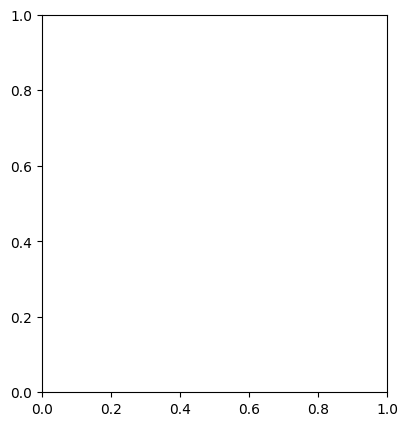

In [51]:
plot_mushroom_boundary(X_test, y_test, clf)